# Contents
1) imports  
2) global settings  
3) analysis  
4) Visualization  
5) A-A distance analysis  
6) no FRET distance analysis  
7) high FRET distance analysis  
8) particle alignment  

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import ImageManipulation as IM
import os
import precisionFuncs as pF
import developmental_functions as df
import AlignStructures as AS
import utility
import histogram_fitting as hfit
from lmfit import fit_report
import aid_functions as aid
import copy
import sys

In [12]:
#for development only
from importlib import reload

# 2) global settings

### optional: merge subfolders into one folder

In [13]:
#FRET-nanoscopy acquisition software creates one folder for each confocal area. 
#Run this function to copy all .ptu files from subfolders of the input folder ('infolder')
#by default all files will be copied into a new subfolder called 'all'.
infolder = r'P:\STED-FRET3D\02_data\211202_DNA_origami_CLR_MR'
aid.simplePTUmerge(infolder)

P:\STED-FRET3D\02_data\211202_DNA_origami_CLR_MR\all


### set global parameters

In [2]:
# directory of this notebook
notebookdir = sys.path[0]
# directory of the dataset
rootdir = os.path.split(notebookdir)[0]
#where the .ptu files are located
wdir = os.path.join(rootdir, 'demo', '20211202')
#where you'd like to save your result files
resdir = os.path.join(rootdir, 'demo', 'analysis')
#this identifier will be used for filenames and graph titles
identifier = 'O(HF+NF)'

### optional: load previously analysed data

if you load previously analysed data, the data will include the first 300 structures and you can skip the analysis step

In [3]:
locfile = os.path.join(resdir, identifier  + '.spots')
anfile = os.path.join(resdir, identifier + '_an.spots')
locLst = df.loadpickle(locfile)
locLst_an = df.loadpickle(anfile)
locLst_stats = df.genStats(locLst_an)

FileNotFoundError: [Errno 2] No such file or directory: 'K:\\vanderVoortN\\Seidel\\demo\\analysis\\O(HF+NF).spots'

# 3) analysis

a demo sample of 10 ptu files is included for testing.

### 1st analysis step: localization

In [ ]:
#the tcspc tac number for gating away the initial part of the STED decay.
gate = 16
#set to True to obtain visual plots to monitor the fitting manually
#set to False for quicker analysis
verbose = False
#don't change below settings
outname = os.path.join(resdir, identifier + '.spots')
options = df.GAP.optionsCluster(fitbg = 0, setbg = 0.2)
wdir = r'P:\STED-FRET\data\20-1\16_CLR_overnight\18Nov+16Jan_merged'
files = os.listdir(wdir)
locLst = df.analyseDir(options, wdir, files, Ggate = gate, Rgate = gate, Ygate = gate,
                             outname = outname, framestop = -1, ROIsize = 30, verbose = verbose,
                        junkIstar = 0.30, garbageBrightness = 50, DTwoIstar = 0.03)
CLR3D_27Okt = locLst

analysing image no. 0
loading file PQSpcm_2019-11-18_23-53-31.ptu
number of records is 395821
analysing image no. 1
loading file PQSpcm_2019-11-18_13-37-22.ptu
number of records is 451296
analysing image no. 2
loading file PQSpcm_2019-11-18_13-37-49.ptu
number of records is 440476
analysing image no. 3
loading file PQSpcm_2019-11-18_13-38-16.ptu
number of records is 437328
analysing image no. 4
loading file PQSpcm_2019-11-18_13-38-43.ptu
number of records is 442560
analysing image no. 5
loading file PQSpcm_2019-11-18_13-39-10.ptu
number of records is 430556
analysing image no. 6
loading file PQSpcm_2019-11-18_13-39-37.ptu
number of records is 437831
analysing image no. 7
loading file PQSpcm_2019-11-18_13-40-04.ptu
number of records is 433523
analysing image no. 8
loading file PQSpcm_2019-11-18_13-40-31.ptu
number of records is 442718
analysing image no. 9
loading file PQSpcm_2019-11-18_13-41-25.ptu
number of records is 437833
analysing image no. 10
loading file PQSpcm_2019-11-18_13-42-

### 2nd analysis step: FRET information

In [ ]:
locfile = os.path.join(resdir, identifier  + '.spots')
anfile = os.path.join(resdir, identifier + '_an.spots')
load = False
if not load:
    ntacs = 256
    outname = os.path.join(resdir, identifier + '_an.spots')
    TACout = os.path.join(resdir, identifier + '_all_PS.dat')
    statsout = os.path.join(resdir, identifier + '.pg4')

    locLst_an = df.analyseLocLst(locLst, Igate = [0,0,0], ltgate = [gate, gate, gate],
                                    verbose = False, framestop = 20, outname = outname,
                                    ntacs = ntacs, bgphotons = [3.7, 4.7, 4.9])
    posdir = os.path.join(resdir, 'positions')
    df.export_position(locLst, posdir)
    #an data contains always the full TCSPC decay
    df.subensembleTAC(locLst_an, ntacs = ntacs, outfile = TACout)
    stats = df.genStats(locLst_an, outfile = statsout, isforMargarita = True)
CLR3D_27Okt = locLst
CLR3D_27Okt_an = locLst_an
CLR3D_27Okt_stats = stats

# 4) Visualize

### spot stoichiometry

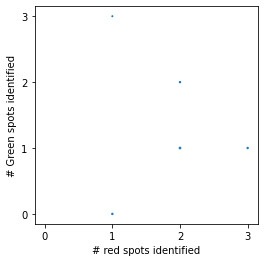

array([[0, 2, 0, 0],
       [0, 0, 3, 2],
       [0, 0, 2, 0],
       [0, 1, 0, 0]])

In [6]:
#here you can get an idea about the number of Donor Only, Acceptor only and degree of labelling
df.plotOccurence(locLst)

### E vs Tau plot

mean Green lifetime for CLR-3D 27 Okt is 1.4
mean Red lifetime for CLR-3D 27 Okt is 3.2
mean Yellow lifetime for CLR-3D 27 Okt is 2.9


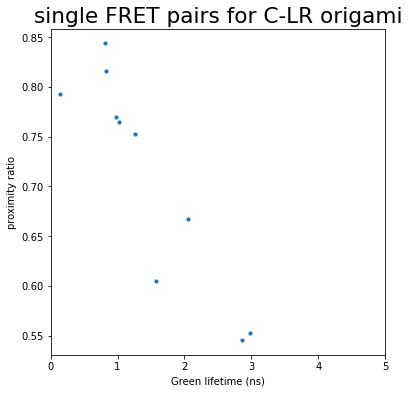

In [7]:
tauG = df.getFRETind(locLst_an, 'tauG')
tauR = df.getFRETind(locLst_an, 'tauR')
tauY = df.getFRETind(locLst_an, 'tauY')
Eprox = df.getFRETind(locLst_an, 'proxRatio')
sample = 'CLR-3D 27 Okt'
plt.figure(figsize = (6,6))
plt.scatter(tauG, Eprox, s = 10)
mpl.rcParams.update({'font.size': 18})
plt.xlabel('Green lifetime (ns)')
plt.ylabel('proximity ratio')
plt.title('single FRET pairs for C-LR origami')
plt.xlim(0,5)
print('mean Green lifetime for %s is %.1f' %(sample, np.mean(tauG)))
print('mean Red lifetime for %s is %.1f' %(sample, np.mean(tauR)))
print('mean Yellow lifetime for %s is %.1f' %(sample, np.mean(tauY)))
#plt.savefig(os.path.join(outdir, 'C-LR_super_super_res.png'), dpi = 300, bbox_inches = 'tight')

# 5) Acceptor-Acceptor distance

### function

execute these functions in order to obtain your result

In [22]:
def getAAdist(AAlocLst, pxSize = 10):
    """assumes all locs have exactly two acceptors"""
    AAdist = []
    for loc in AAlocLst:
        Rdist = df. getCoordFromSpot(loc['Y'].spotLst[0]) - \
            df.getCoordFromSpot(loc['Y'].spotLst[1])
        AAdist.append(Rdist)
    AAdist = np.array(AAdist) * pxSize
    return AAdist

### settings

In [23]:
#set the maximum distance you'd like to plot
maxdist = 120
#set the binwidth for histogramming the data
binwidth = 2
#this helps you to recognize your fit later
fitIdentifier = 'AAdist'

### XY scatter diagram

center of dataset is 7.62, -5.47 (x,y)


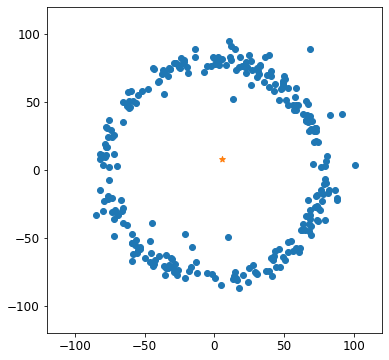

In [24]:
#the diagram is symmetric because the orientation of the molecular assembly on the surface is also random
##leave as-is
# get the data and filter
slocLst = df.selectSpotOccurence(locLst_an, [0,1,2], [2])

#settings global to nc Chi fits
mpl.rcParams['font.size'] = 12
# plot the xy scatter data
#this is not generic, make into something generic
dist = getAAdist(slocLst)
plt.figure(figsize = (6,6))
plt.scatter(-dist[:,1], dist[:,0])
plt.xlim(-maxdist,maxdist)
plt.ylim(-maxdist,maxdist)

center = np.mean(dist, axis = 0)
plt.scatter(-center[1], center[0], marker = '*')#, color = 'orange')
print('center of dataset is %.2f, %.2f (x,y)' % (center[0], center[1]))
plt.show()


### create a histogram

In [25]:
#get the absolute distance
distnorm = np.linalg.norm(dist, axis = 1)
# bin the data
counts, bin_edges, _ = plt.hist(distnorm, bins = np.arange(0, maxdist, binwidth))
plt.clf()
Nbins = bin_edges.shape[0] - 1
bincenters = np.zeros(Nbins)
for i in range(Nbins):
    bincenters[i] = (bin_edges[i] + bin_edges[i + 1]) / 2

<Figure size 432x288 with 0 Axes>

### non-centered chi Fit

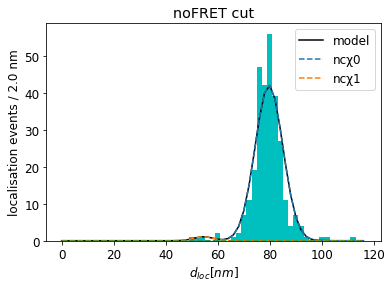

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 523
    # data points      = 1
    # variables        = 6
    chi-square         = 6119.28012
    reduced chi-square = 6119.28012
    Akaike info crit   = 20.7191997
    Bayesian info crit = 8.71919974
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    bg:    0 (fixed)
    mu0:   79.5118957 (init = 75)
    A0:    562.166234 (init = 500)
    sig0:  5.33943984 (init = 3)
    mu1:   54.4079101 (init = 50)
    A1:    9.83550443 (init = 100)
    sig1:  3.66788220 (init = 5)
AIC for custom fit is 168.45


In [26]:
# set your fit settings here
p = hfit.genPeakEst(2, counts, bincenters)
p['bg'].set(vary = False, value = 0)
p['mu0'].set(vary = True, value = 75)
p['sig0'].set(vary = True, value = 3)
p['A0'].set(vary = True, value = 500)
p['mu1'].set(vary = True, value = 50)
p['sig1'].set(vary = True, value = 5)
p['A1'].set(vary = True, value = 100)
#p['mu2'].set(vary = False, value = 82)
#p['sig2'].set(vary = False, value = 3)
#p['A2'].set(vary = True, value = 500)
fitres, AIC, *_ = hfit.fitDistr(p, hfit.NncChidistr, bincenters, counts)
plt.figure(figsize = (6, 4))
hfit.plotdistr(distnorm, bincenters, fit = fitres, title = 'noFRET cut', )
                           #modelout = modelout, plotout = plotout)
print(fit_report(fitres))
print('AIC for custom fit is %.2f' % AIC)

### Support plane

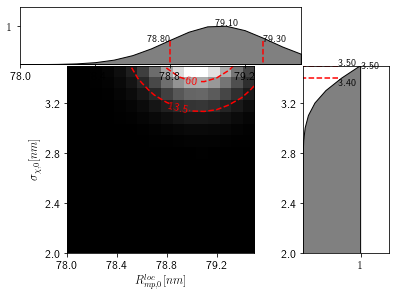

In [27]:
#once you've created your support plane surface, you may re-load it.
load = False
#set the parameters you'd like to scan
param_ranges={"sig0":np.arange(2, 3.6, .1),"mu0":np.arange(78,79.6, .1)}
#set these settings the same as your optimal fit
p = hfit.genPeakEst(2, counts, bincenters)
p['bg'].set(vary = False, value = 0)
p['mu0'].set(vary = True, value = 78)
p['sig0'].set(vary = True, value = 5)
p['A0'].set(vary = True, value = 859)
p['mu1'].set(vary = True, value = 67)
p['sig1'].set(vary = True, value = 14)
p['A1'].set(vary = True, value = 594)
#p['mu2'].set(vary = True, value = 43)
#p['sig2'].set(vary = True, value = 22)
#p['A2'].set(vary = True, value = 212)

surfaceout = os.path.join(resdir, fitIdentifier + 'surface.txt')
if load:
    surface = np.genfromtxt(surfaceout)
else: 
    surface = hfit.scanLikelihoodSurface(param_ranges, p, bincenters, counts, verbose = False)
    np.savetxt(surfaceout, surface)    

outname = os.path.join(resdir, fitIdentifier + 'supportplane.png')
hfit.plotLikelihoodSurface(surface, param_ranges, outname = outname, title =fitIdentifier, skip = 4,
                        figsize = (6, 4), isplotpdf = True)

# 6) no FRET distance analysis

### settings and filter settings

execute these functions in order to obtain your result

In [53]:
# we want to isolate the noFRET species using these selection criteria
# we want to include as many potential FRET pairs as possible, so we include partially labelled structures
slocLst = df.selectSpotOccurence(locLst_an, [1, 2], [1, 2])
# select based pseudo-efficiency or proximity FRET
# note: start from 0.01 to exclude incomplete pairs
slocLst = df.filterFRETind(slocLst, 'proxRatio', 0.01, 0.4)
# select on the green fluorescent lifetime (ns)
slocLst = df.filterFRETind(slocLst, 'tauG', 2.5, 3.5)
# select only spots that have a minumum amount of photons
slocLst = df.filterFRETind(slocLst, 'NG', 150, 1e8)
slocLst = df.filterFRETind(slocLst, 'NY', 150, 1e8)

# for exporting a sub-ensemble lifetime decay, we additionally 
# select on the localisation-based donor-acceptor distance
tcspclocLst = df.filterFRETind(slocLst, 'dist', 10, 25)

#set identifier, max distance and binwidth as before
fitIdentifier = 'NFdist'
maxdist = 40
binwidth = 1

### make scatter plot

P:\STED-FRET\Origamis\data\CLR_stats
5.0 nm in x and 0.0 nm in y subtracted
center of dataset is 2.60, -1.29 (x,y)


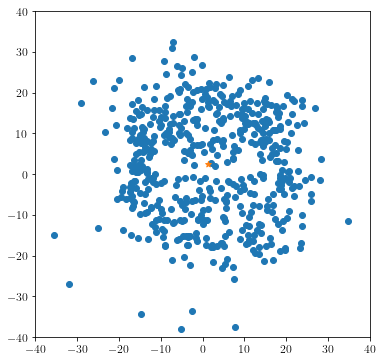

In [54]:
TACout = os.path.join(resdir, identifier + '_NF_P+S_0.txt')
df.subensembleTAC(tcspclocLst, outfile = TACout)

#settings global to nc Chi fits
mpl.rcParams['font.size'] = 12

# plot the xy scatter data
distx = df.getFRETind(slocLst, 'distx')
disty = df.getFRETind(slocLst, 'disty')
dist = np.array((distx, disty)).transpose()
dist = df.filterVec(dist, maxval = maxdist, center = (5, 0))
#dist = df.filterVec(dist, maxval = maxdist)

plt.figure(figsize = (6,6))
plt.scatter(-dist[:,1], dist[:,0])
plt.xlim(-maxdist,maxdist)
plt.ylim(-maxdist,maxdist)

center = np.mean(dist, axis = 0)
plt.scatter(-center[1], center[0], marker = '*')#, color = 'orange')
print('center of dataset is %.2f, %.2f (x,y)' % (center[0], center[1]))
plt.show()


### make histogram

In [55]:
#get the absolute distance
distnorm = np.linalg.norm(dist, axis = 1)
# bin the data
#need to change to using numpy  hist
counts, bin_edges, _ = plt.hist(distnorm, bins = np.arange(0, maxdist, binwidth))
plt.clf()
Nbins = bin_edges.shape[0] - 1
bincenters = np.zeros(Nbins)
for i in range(Nbins):
    bincenters[i] = (bin_edges[i] + bin_edges[i + 1]) / 2

<Figure size 432x288 with 0 Axes>

### non-centered chi Fit

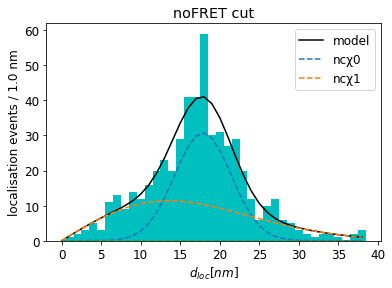

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 347
    # data points      = 1
    # variables        = 6
    chi-square         = 8507.50574
    reduced chi-square = 8507.50574
    Akaike info crit   = 21.0487041
    Bayesian info crit = 9.04870408
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    bg:    0 (fixed)
    mu0:   17.5046877 (init = 16)
    A0:    276.400979 (init = 100)
    sig0:  3.62886684 (init = 3)
    mu1:   0.13298581 (init = 0)
    A1:    253.542283 (init = 426)
    sig1:  13.5409541 (init = 15)
AIC for custom fit is 196.47


In [56]:
# set your fit parameters here
p = hfit.genPeakEst(2, counts, bincenters)
p['bg'].set(vary = False, value = 0)
p['mu0'].set(vary = True, value = 16)
p['sig0'].set(vary = True, value = 3)
p['A0'].set(vary = True, value = 100)
p['mu1'].set(vary = True, value = 0)
p['sig1'].set(vary = True, value = 15)
p['A1'].set(vary = True, value = 426)
#p['mu2'].set(vary = True, value = 82)
#p['sig2'].set(vary = True, value = 5)
fitres, AIC, *_ = hfit.fitDistr(p, hfit.NncChidistr, bincenters, counts)
plt.figure(figsize = (6, 4))
hfit.plotdistr(distnorm, bincenters, fit = fitres, title = 'noFRET cut', )
                           #modelout = modelout, plotout = plotout)
print(fit_report(fitres))
print('AIC for custom fit is %.2f' % AIC)

### Support plane

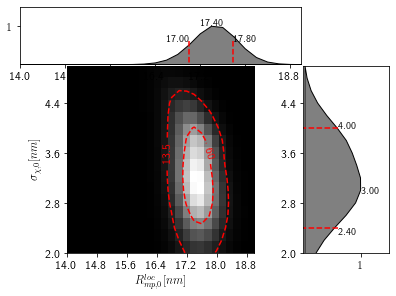

In [57]:
#once you've created your support plane, you may re-load it.
load = False
#set the parameters you'd like to scan
param_ranges={"sig0":np.arange(2.0,5.1,.2),"mu0":np.arange(14,19.1, .2)}
#set these settings the same as your optimal fit
p = hfit.genPeakEst(2, counts, bincenters)
p['bg'].set(vary = False, value = 0)
p['mu0'].set(vary = True, value = 16)
p['sig0'].set(vary = True, value = 3)
p['A0'].set(vary = True, value = 300)
p['mu1'].set(vary = True, value = 10)
p['sig1'].set(vary = True, value = 10)
p['A1'].set(vary = True, value = 333)
#p['mu2'].set(vary = True, value = 43)
#p['sig2'].set(vary = True, value = 22)
#p['A2'].set(vary = True, value = 212)

surfaceout = os.path.join(resdir, fitIdentifier + 'surface.txt')
if load:
    surface = np.genfromtxt(surfaceout)
else: 
    surface = hfit.scanLikelihoodSurface(param_ranges, p, bincenters, counts, verbose = False)
    np.savetxt(surfaceout, surface)    

outname = os.path.join(resdir, fitIdentifier + 'supportplane.png')
hfit.plotLikelihoodSurface(surface, param_ranges, outname = outname, title = fitIdentifier, skip = 4,
                        figsize = (6, 4), isplotpdf = True)

# 7) high FRET distance analysis

### settings and filter settings

execute these functions in order to obtain your result

In [58]:
# we want to isolate the high FRET species using these selection criteria
# we want to include as many potential FRET pairs as possible, so we include partially labelled structures
slocLst = df.selectSpotOccurence(locLst_an, [1, 2], [1, 2])
# select based pseudo-efficiency or proximity FRET
# note: start from 0.01 to exclude incomplete pairs
slocLst = df.filterFRETind(slocLst, 'proxRatio', 0.55, 0.75)
# select on the green fluorescent lifetime (ns)
slocLst = df.filterFRETind(slocLst, 'tauG', 1, 3)
# select only spots that have a minumum amount of photons
slocLst = df.filterFRETind(slocLst, 'NG', 100, 1e8)
slocLst = df.filterFRETind(slocLst, 'NY', 100, 1e8)

# for exporting a sub-ensemble lifetime decay, we additionally 
# select on the localisation-based donor-acceptor distance
tcspclocLst = df.filterFRETind(slocLst, 'dist', 0, 15)

#set identifier, max distance and binwidth as before
fitIdentifier = 'HFdist'
maxdist = 40
binwidth = 0.5

### make scatter plot

P:\STED-FRET\Origamis\data\CLR_stats
5.0 nm in x and 0.0 nm in y subtracted
center of dataset is -0.43, -1.64 (x,y)


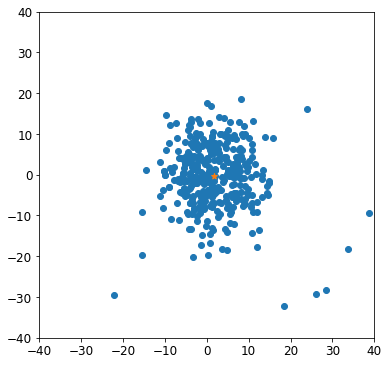

In [59]:
TACout = os.path.join(resdir, identifier + '_HF_P+S_0.txt')
df.subensembleTAC(tcspclocLst, outfile = TACout)

#settings global to nc Chi fits
mpl.rcParams['font.size'] = 12

# plot the xy scatter data
distx = df.getFRETind(slocLst, 'distx')
disty = df.getFRETind(slocLst, 'disty')
dist = np.array((distx, disty)).transpose()
dist = df.filterVec(dist, maxval = maxdist, center = (5, 0))
#dist = df.filterVec(dist, maxval = maxdist)

plt.figure(figsize = (6,6))
plt.scatter(-dist[:,1], dist[:,0])
plt.xlim(-maxdist,maxdist)
plt.ylim(-maxdist,maxdist)

center = np.mean(dist, axis = 0)
plt.scatter(-center[1], center[0], marker = '*')#, color = 'orange')
print('center of dataset is %.2f, %.2f (x,y)' % (center[0], center[1]))
plt.show()


### make histogram

In [60]:
#get the absolute distance
distnorm = np.linalg.norm(dist, axis = 1)
# bin the data
#need to change to using numpy  hist
counts, bin_edges, _ = plt.hist(distnorm, bins = np.arange(0, maxdist, binwidth))
plt.clf()
Nbins = bin_edges.shape[0] - 1
bincenters = np.zeros(Nbins)
for i in range(Nbins):
    bincenters[i] = (bin_edges[i] + bin_edges[i + 1]) / 2

<Figure size 432x288 with 0 Axes>

### non-centered chi Fit

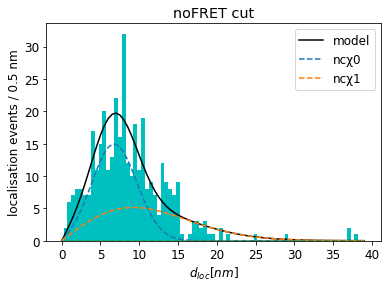

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 753
    # data points      = 1
    # variables        = 5
    chi-square         = 20078.8941
    reduced chi-square = 20078.8941
    Akaike info crit   = 19.9074245
    Bayesian info crit = 9.90742450
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    bg:    0 (fixed)
    mu0:   6.15931427 (init = 6)
    A0:    106.090652 (init = 100)
    sig0:  3 (fixed)
    mu1:   0.00276166 (init = 8)
    A1:    78.3935093 (init = 100)
    sig1:  9.25046722 (init = 8)
AIC for custom fit is 293.40


In [61]:
# set your fit parameters here
p = hfit.genPeakEst(2, counts, bincenters)
p['bg'].set(vary = False, value = 0)
p['mu0'].set(vary = True, value = 6)
p['sig0'].set(vary = False, value = 3)
p['A0'].set(vary = True, value = 100)
p['mu1'].set(vary = True, value = 8)
p['sig1'].set(vary = True, value = 8)
p['A1'].set(vary = True, value = 100)
fitres, AIC, *_ = hfit.fitDistr(p, hfit.NncChidistr, bincenters, counts)
plt.figure(figsize = (6, 4))
hfit.plotdistr(distnorm, bincenters, fit = fitres, title = 'noFRET cut', )
                           #modelout = modelout, plotout = plotout)
print(fit_report(fitres))
print('AIC for custom fit is %.2f' % AIC)

### Support plane

K:\vanderVoortN\FRC\Code\histogram_fitting.py:254: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(surface, levels = contourlevels, colors = 'r', linestyles = 'dashed', extent = [xmin, xmax, ymax, ymin])


ValueError: attempt to get argmin of an empty sequence

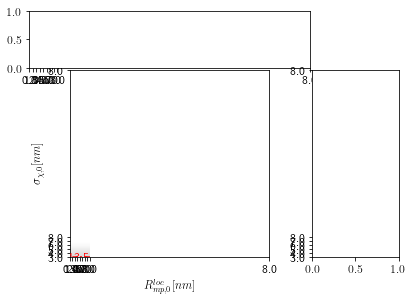

In [62]:
#once you've created your support plane, you may re-load it.
load = True
#set the parameters you'd like to scan
param_ranges={"sig0":np.arange(3.0,8.1,.1),"mu0":np.arange(0,8.1, .1)}
#set these settings the same as your optimal fit
p = hfit.genPeakEst(2, counts, bincenters)
p['bg'].set(vary = False, value = 0)
p['mu0'].set(vary = True, value = 6)
p['sig0'].set(vary = False, value = 3)
p['A0'].set(vary = True, value = 100)
p['mu1'].set(vary = True, value = 8)
p['sig1'].set(vary = True, value = 8)
p['A1'].set(vary = True, value = 100)

surfaceout = os.path.join(resdir, fitIdentifier + 'surface.txt')
if load:
    surface = np.genfromtxt(surfaceout)
else: 
    surface = hfit.scanLikelihoodSurface(param_ranges, p, bincenters, counts, verbose = False)
    np.savetxt(surfaceout, surface)    

outname = os.path.join(resdir, fitIdentifier + 'supportplane.png')
hfit.plotLikelihoodSurface(surface, param_ranges, outname = outname, title = fitIdentifier, skip = 10,
                        figsize = (6, 4), isplotpdf = True)

# Particle Averaging

### functions

In [23]:
def getTwoPointAngle(point1, point2):
    Dx, Dy = point2 - point1
    return np.arctan2(Dy, Dx)
def CoarseAlignPointset(EnsemblePointSet, showunflipped = False):
    EnsemblePointSet.callBatchFun('RepositionToPoint', 'A1')
    disp = EnsemblePointSet.calcAvgDisplacement(['D1', 'D2'], ['A1', 'A2'])
    print(disp)
    EnsemblePointSet.callBatchFun('applyChannelShift', ('D1', 'D2'), disp)
    #EnsemblePointSet.callBatchFun('relabelOnFRETIndicator', 'proxRatio')

    EnsemblePointSet.callBatchFun('calcAngle')
    EnsemblePointSet.callBatchFun('rotate')
    #EnsemblePointSet.callBatchFun('rotate', np.pi) #easier for my brain
    if showunflipped:
        fig = DADApointset.plotPointsets(xlim = (-20, 100))
        plt.show()
    for pointset in EnsemblePointSet.pointsets:
        #if mean y coordinate < 0, flip the structure, y has index 1
        isDonorBelowXaxis = pointset.points['D1'][1] + pointset.points['D2'][1] < 0 
        if isDonorBelowXaxis:
            pointset.mirror(mirrorAxis = 'horizontal')
    if showunflipped:
        fig = DADApointset.plotPointsets(xlim = (-20, 100))
        plt.show()

### settings

In [24]:
#set the pixel size from your measurement
pxSize = 10
#set the structure no. which should serve as an anchor
#see below for finding the best anchor
anchorstruct = 329
# set the cutoff from which deviation a molecular assembly is considered junk
RMSDcut = 0.6 # in pixels
#rotate the final structure for nice visualisation
manualAngle = 0# in radians

### Align all structures

[ 0.53604156 -0.14620602]


K:\vanderVoortN\FRC\Code\AlignStructures.py:31: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  j = np.matrix([[c, s], [-s, c]])


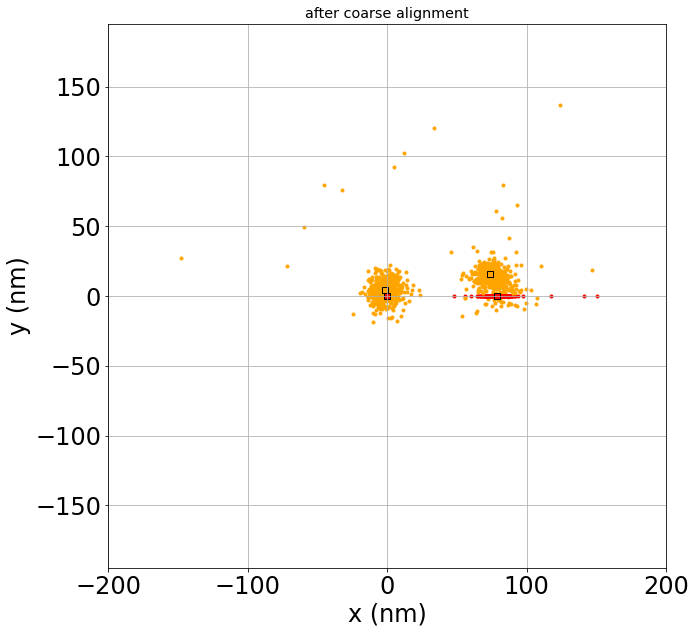

pruned 135 elements


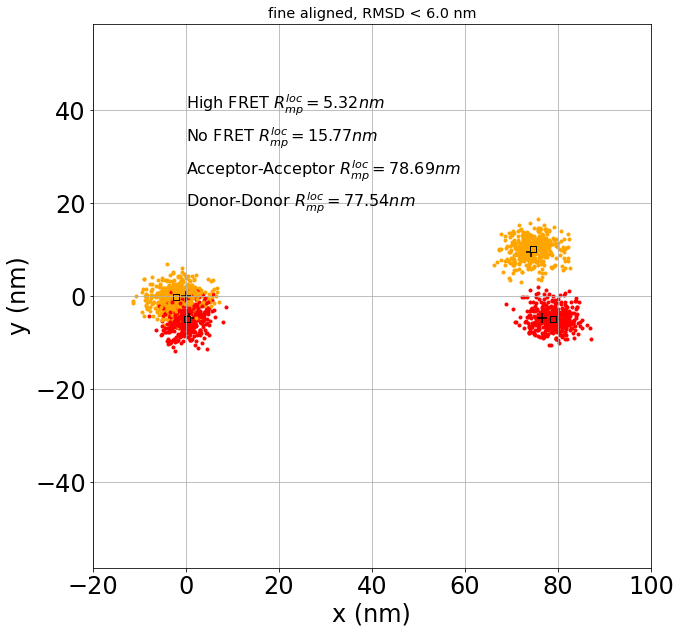

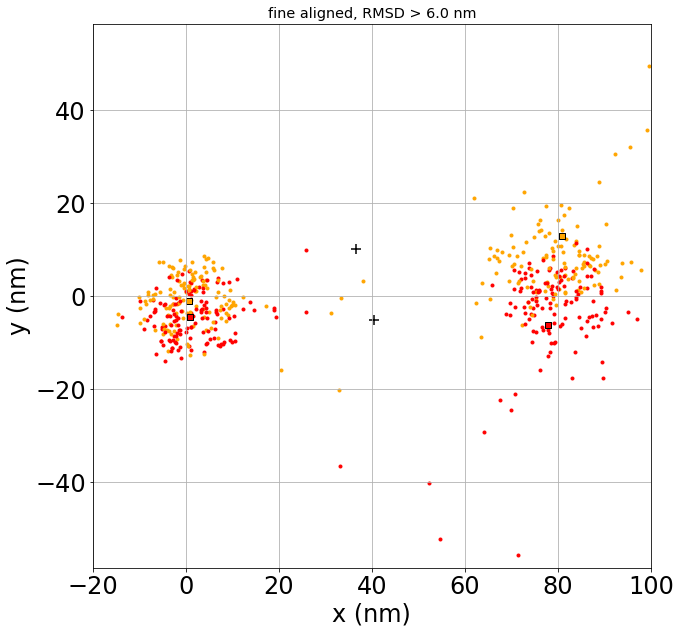

In [27]:

DADAlocLst = df.selectSpotOccurence(locLst_an, [2], [2])
DADApointset = AS.ensemblePointSet.fromlocLst(DADAlocLst, pxSize)

CoarseAlignPointset(DADApointset, showunflipped = False)

fig = DADApointset.plotPointsets(xlim = (-200, 200))
plt.title('after coarse alignment')
plt.show()
#DADApointset.genAnchorFromModel()
DADApointset.genAnchorFromPointset(anchorstruct)
DADApointset.batchRmsd()
allscores = np.array(DADApointset.scores)


DADApointsetPruned = copy.deepcopy(DADApointset)
pruneIDs = DADApointset.pruneByScore(RMSDcut)
DADApointsetPruned.selectOnPointsetIDs(pruneIDs)
DADApointset.genAnchorFromModel(H2H = 2.4)


#set meanD1 to 0,0 and A2 to x axis for figure
pointout = np.array(DADApointset.callBatchFun('getPoints'))
meanD1, meanD2, meanA1, meanA2 = np.mean(pointout, axis = 0)
meanA1A2Angle = getTwoPointAngle(meanA1, meanA2)

#transfrom model
anchorD1 = copy.deepcopy(DADApointset.anchor.points['D1'])
DADApointset.anchor.applyChannelShift(['D1', 'D2', 'A1', 'A2'], anchorD1)
modelA1A2Angle = getTwoPointAngle(DADApointset.anchor.points['A1'], DADApointset.anchor.points['A2'])
DADApointset.anchor.rotate(angle = modelA1A2Angle - manualAngle)
CMmodel = np.mean(np.array([x for x in DADApointset.anchor.points.values()]), axis = 0)

#transfrom data
DADApointset.callBatchFun('rotate', angle = meanA1A2Angle - manualAngle)
DADApointset.callBatchFun('applyChannelShift', ['D1', 'D2', 'A1', 'A2'], -CMmodel)
pointout = np.array(DADApointset.callBatchFun('getPoints'))
meanpositions = np.mean(pointout, axis = 0)
meanstds = np.std(pointout, axis = 0)

#transform pruned data
DADApointsetPruned.callBatchFun('applyChannelShift', ['D1', 'D2', 'A1', 'A2'], meanD1)
DADApointsetPruned.callBatchFun('rotate', angle = meanA1A2Angle + manualAngle)


#plot
fig = DADApointset.plotPointsets(xlim = (-20, 100))
plt.title('fine aligned, RMSD < %.1f nm' % (RMSDcut * pxSize))
D1A1mean = np.linalg.norm(meanpositions[2] - meanpositions[0]) * pxSize
D2A2mean = np.linalg.norm(meanpositions[3] - meanpositions[1]) * pxSize
DDmean = np.linalg.norm(meanpositions[1] - meanpositions[0]) * pxSize
AAmean = np.linalg.norm(meanpositions[3] - meanpositions[2]) * pxSize
ax = fig.gca()
ax.text(0,40,'High FRET $R_{mp}^{loc} = %.2f nm$' % D1A1mean, fontsize = 16)
ax.text(0,33,'No FRET $R_{mp}^{loc} = %.2f nm$' % D2A2mean, fontsize = 16)
ax.text(0,26,'Acceptor-Acceptor $R_{mp}^{loc} = %.2f nm$' % AAmean, fontsize = 16)
ax.text(0,19,'Donor-Donor $R_{mp}^{loc} = %.2f nm$' % DDmean, fontsize = 16)
DADApointsetPruned.plotPointsets(xlim = (-20, 100))
plt.title('fine aligned, RMSD > %.1f nm' % (RMSDcut * pxSize))

#save
outdir = r'P:\STED-FRET\Origamis\data\aligned'
ffile = os.path.join(outdir, 'positionsRMSDSmaller1.csv')
DADApointset.savePointsetsToCsv(ffile)
ffile = os.path.join(outdir, 'positionsRMSDGreater1.csv')
DADApointsetPruned.savePointsetsToCsv(ffile)
ffile = os.path.join(outdir, 'meanpositions.csv')
np.savetxt(ffile, meanpositions)
ffile = os.path.join(outdir, 'stderrofMeans.csv')
np.savetxt(ffile, meanstds)

### get the RMSD cutoff

Plot a histogram of the RMSD scores.  
The histogram can be used to set an optimal RMSD cutoff, 
balancing statistics for getting only the best samples.  

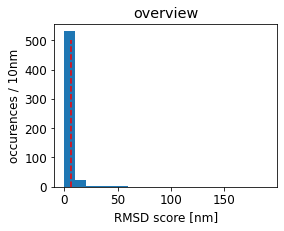

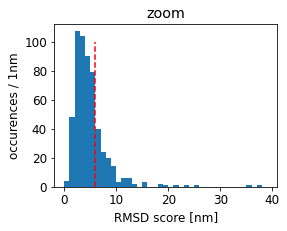

In [30]:
mpl.rcParams['font.size'] = 12
pxSize = 10
outdir = r'P:\STED-FRET\paper\SI\Supplementary Figure S9'

outallscores = os.path.join(outdir, 'scores.txt')
np.savetxt(outallscores,allscores, delimiter = ',')

plt.figure(figsize = (4,3))
plt.hist(np.array(allscores) * pxSize, bins = np.arange(0,200,10))
plt.vlines(RMSDcut * pxSize, 0,500, 'r', ls = '--')
plt.xlabel('RMSD score [nm]')
plt.ylabel('occurences / 10nm')
plt.title('overview')
outname = os.path.join(outdir, 'RMSD_overview.png')
plt.savefig(outname, dpi = 300, bbox_inches = 'tight')
plt.show()

plt.figure(figsize = (4,3))
plt.hist(np.array(allscores) * pxSize, bins = np.arange(0,40,1))
plt.vlines(RMSDcut * pxSize, 0,100, 'r', ls = '--')
plt.xlabel('RMSD score [nm]')
plt.ylabel('occurences / 1nm')
plt.title('zoom')
outname = os.path.join(outdir, 'RMSD_zoom.png')
plt.savefig(outname, dpi = 300, bbox_inches = 'tight')
plt.show()

### Select the best anchor

When an apriori model is not known, we can use one of the measurements as an anchor for aligning all structures to.
This has as an additional advantage that we don't insert our own assumptions in the interpretation of the data.  
To find the best anchor, all structures are considered as a model. Then all structures are aligned to this anchor. The anchor with the lowest average RMSD can then be used for the final analyis.  
Some constructs are really junk data, to prevent them heavily affecting the average RMSD, they are removed if RMSD is larger than *minscore*.  
To qualify as an anchor, at least *minconstructs* must have an RMSD lower than *minscore*. This is done to filter junk anchors.  
This is an nxn operation and can take some time..

In [31]:
#settings
minscore = RMSDcut
minconstructs = 50

[ 0.53604156 -0.14620602]
pruned 520 elements
pruned 333 elements
pruned 205 elements
pruned 543 elements
pruned 195 elements
pruned 303 elements
pruned 275 elements
pruned 201 elements
pruned 131 elements
pruned 215 elements
pruned 150 elements
pruned 553 elements
pruned 208 elements
pruned 254 elements
pruned 196 elements
pruned 313 elements
pruned 229 elements
pruned 280 elements
pruned 359 elements
pruned 166 elements
pruned 565 elements
pruned 293 elements
pruned 290 elements
pruned 189 elements
pruned 156 elements
pruned 161 elements
pruned 557 elements
pruned 386 elements
pruned 459 elements
pruned 402 elements
pruned 175 elements
pruned 499 elements
pruned 420 elements
pruned 185 elements
pruned 211 elements
pruned 305 elements
pruned 264 elements
pruned 525 elements
pruned 262 elements
pruned 254 elements
pruned 343 elements
pruned 221 elements
pruned 158 elements
pruned 399 elements
pruned 193 elements
pruned 166 elements
pruned 532 elements
pruned 196 elements
pruned 235 ele

pruned 352 elements
pruned 128 elements
pruned 277 elements
pruned 478 elements
pruned 364 elements
pruned 396 elements
pruned 209 elements
pruned 463 elements
pruned 295 elements
pruned 200 elements
pruned 546 elements
pruned 529 elements
pruned 451 elements
pruned 239 elements
pruned 260 elements
pruned 522 elements
pruned 266 elements
pruned 334 elements
pruned 158 elements
pruned 406 elements
pruned 565 elements
pruned 177 elements
pruned 312 elements
pruned 368 elements
pruned 212 elements
pruned 236 elements
pruned 182 elements
pruned 348 elements
pruned 372 elements
pruned 376 elements
pruned 301 elements
pruned 179 elements
pruned 179 elements
pruned 201 elements
pruned 341 elements
pruned 247 elements
pruned 201 elements
pruned 250 elements
pruned 154 elements
pruned 181 elements
pruned 541 elements
pruned 186 elements
pruned 537 elements
pruned 154 elements
pruned 371 elements
pruned 347 elements
pruned 196 elements
pruned 448 elements
pruned 176 elements
pruned 200 elements


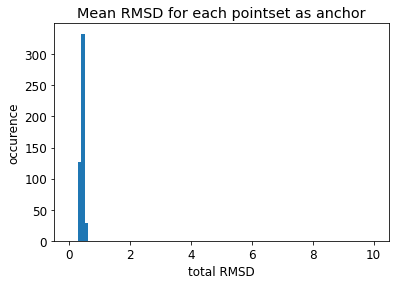

In [33]:
#leave as-is
DADAlocLst = df.selectSpotOccurence(locLst_an, [2], [2])
DADApointset = AS.ensemblePointSet.fromlocLst(DADAlocLst, pxSize)
CoarseAlignPointset(DADApointset)

allScores = []
for i in range (len(DADApointset.pointsets)):
    DADApointset_cp = copy.deepcopy(DADApointset)
    DADApointset_cp.genAnchorFromPointset(i)
    DADApointset_cp.batchRmsd()
    DADApointset_cp.pruneByScore(minscore)
    #DADApointset_cp.plotPointsets()
    if len(DADApointset_cp.scores) > minconstructs:
        allScores.append(np.mean(DADApointset_cp.scores))
    else: allScores.append(1e5)
_ = plt.hist(allScores, range = (0,10), bins = 100)
plt.title('Mean RMSD for each pointset as anchor')
plt.ylabel('occurence')
plt.xlabel('total RMSD')
print('pointset with the lowest overall RMSD is %i' % np.argmin(allScores))

# Ancillary functions

### Rich spot stoichiometry

In [38]:
#mdify function for pretty plot
from matplotlib import patches

def plotOccurence(locLst, title = '', outname = None):
    """plots a 2D histogram of how many spots have been fitted
    in the Green and red channel.
    Takes as argument a spotLst Lst"""
    Gspots, Yspots = df.genOccurrence(locLst)
    #find max occurence
    #Gmax = max(Gspots) + 1#+1 to store zero entries
    #Ymax = max(Yspots) + 1
    Gmax = 4
    Ymax = 4
    occurence = np.zeros([Gmax,Ymax], int)
    for Gspot, Yspot in zip(Gspots, Yspots):
        try:
            occurence[Gspot, Yspot] += 1
        except:
            pass
    plt.figure(figsize = [6,6])
    x, y = np.meshgrid(np.arange(Gmax),np.arange(Ymax))
    plt.scatter(x,y, s = occurence.T)
    for x in range(Gmax):
        for y in range(Ymax):
            plt.annotate(occurence[x,y], (x+0.2, y))
    
    ax = plt.gca()
    border = 0.4
    ax.add_patch(patches.Rectangle((1-border,-border), 2 + 2*border, 2*border, color = 'g', fill = False
                                  , linewidth = '2'))
    ax.add_patch(patches.Rectangle((-1*border,1-border), 2.5*border, 2 + 2*border, color = 'r', fill = False
                                  , linewidth = '2'))
    ax.add_patch(patches.Rectangle((2-0.5*border,2-border), 2*border, 2*border, color = 'k', fill = False
                                  , linewidth = '2'))
    ax.set_xticks(np.arange(Ymax))
    ax.set_yticks(np.arange(Gmax))
    plt.xlim(-0.5,3.5)
    plt.ylim(-0.5,3.5)
    plt.xlabel ('# donor spots identified')
    plt.ylabel ('# acceptor spots identified')
    plt.title(title)
    if outname:
        plt.savefig(outname, bbox_inches = 'tight', dpi = 300)
    plt.show()
    return occurence

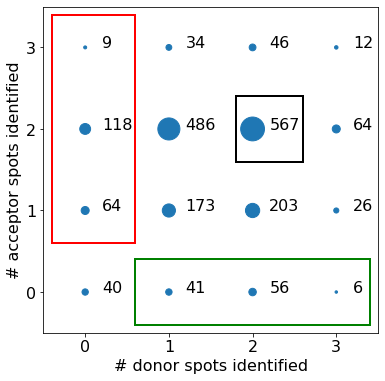

array([[ 40,  64, 118,   9],
       [ 41, 173, 486,  34],
       [ 56, 203, 567,  46],
       [  6,  26,  64,  12]])

In [39]:
from matplotlib import rc
font = {'size'   : 16}
rc('font', **font)
outname = os.path.join(resdir, 'OrigamiStoichiometry_pretty.png')
plotOccurence(locLst, outname = outname)


### export $D_0$ and $A_{only}$ populations

In [41]:
outfile = os.path.join(resdir, 'D0', 'STEDCLRD0.pg4')
CLRD0 = df.selectSpotOccurence(locLst, [1], [0])
df.GetfixedlocBrightness(CLRD0, loccolor = 'G', outpath = outfile)
resdir = r'P:\STED-FRET\Origamis\data\CLR_stats'
outfile = os.path.join(resdir, 'Aonly', 'STEDCLRAonly.pg4')
CLRAonly = df.selectSpotOccurence(locLst, [0], [1])
df.GetfixedlocBrightness(CLRAonly, loccolor = 'Y', outpath = outfile)

array([[ 295,  561,  969],
       [ 176,  110,  452],
       [   8,   98, 1404],
       [  15,   27,  185],
       [   4,   11,  133],
       [ 160,  357,  736],
       [ 112,  157, 1259],
       [ 175,  201,  263],
       [ 356,  163,   76],
       [   9,   37,  247],
       [ 329,  650, 1180],
       [  15,   83, 1079],
       [  14,  138, 1295],
       [ 340,  208,  876],
       [   6,   55,  728],
       [ 143,  632, 1321],
       [  81,  188,  475],
       [   9,   87, 1050],
       [   5,   86, 1092],
       [   7,   75,  849],
       [  71,   64,  168],
       [   8,   18,  187],
       [  26,   51,  385],
       [ 217,  175,  192],
       [   7,   68, 1001],
       [  37,  587, 1002],
       [ 678,  577,  271],
       [  23,   56,  221],
       [  33,   32,   80],
       [ 597,  270,  323],
       [ 305,  137,  184],
       [  10,   45,  412],
       [  26,   76,  743],
       [ 656,  356,  449],
       [  25,  151, 1123],
       [ 293,  934, 1435],
       [  12,   16,   77],
 

### Calculate theoretical precison

In [44]:
#A2stats = df.genStats(A2locLst)
Gspots = [2]
Yspots = [2]
filterLst = df.selectSpotOccurence(locLst, Gspots, Yspots)
stats = df.genStats(filterLst)
print('mean NG is %.0f' %
      np.mean(np.array(stats['AG']) * np.array(stats['sigmaG'])**2 *2 * np.pi))
print('mean sigmaG is %.2f' % (np.mean(stats['sigmaG'])*10))
print('mean FWHM G is %.2f' % (np.mean(stats['sigmaG'])*10 * 2.355))
print('mean bgG is %.2f' % np.mean(stats['bgG']))
print('mean NY is %.0f' %
      np.mean(np.array(stats['AY']) * np.array(stats['sigmaY'])**2 *2 * np.pi))
print('mean sigmaY is %.2f' % (np.mean(stats['sigmaY'])*10))
print('mean FWHM Y is %.2f' % (np.mean(stats['sigmaY'])*10 * 2.355))
print('mean bgY is %.2f' % np.mean(stats['bgY']))
Gprecision = np.sqrt(pF.findVar([0,0,32,0.12, 392], 10))
print('standard deviation of G Channel is %.2f nm' % Gprecision)
Yprecision = np.sqrt(pF.findVar([0,0,26,0.62, 724], 10))
print('standard deviation of Y Channel is %.2f nm' % Yprecision)
posprecision = 0
print('uncertainty in dye position is assumed to be %.2f nm' % posprecision)
chiSigma = np.sqrt (Gprecision**2 + Yprecision**2 + posprecision**2)
print('expected sigma of chi distribution is %.2f nm' % chiSigma)
#df.estChiSigma(29, 25, 147, 605, 0.11, 0.58, 10, 2)
RMSDprecision = np.sqrt ( 2 * Gprecision**2 + 2* Yprecision**2 + 4 * posprecision**2)
print('expected RMSD value is %.2f' % RMSDprecision )

outname = r'P:\STED-FRET\paper\SI\Supplementary Figure S17\CLR-2D2A\CLR-2D2A.txt'
utility.reportLocStats(filterLst, outname = outname)

mean NG is 735
mean sigmaG is 31.64
mean FWHM G is 74.52
mean bgG is 0.29
mean NY is 728
mean sigmaY is 21.70
mean FWHM Y is 51.09
mean bgY is 0.36
standard deviation of G Channel is 1.66 nm
standard deviation of Y Channel is 1.09 nm
uncertainty in dye position is assumed to be 0.00 nm
expected sigma of chi distribution is 1.99 nm
expected RMSD value is 2.81
loc Accury indicators:
Green photons is 735 +- 652
green spot sigma is 31.64 +- 3.55
green spot FWHM is 74.52 +- 8.36
Green background is 0.29 +- 0.09
Yellow photons is 728 +- 523
Yellow spot sigma is 21.70 +- 1.53
Yellow spot FWHM is 51.09 +- 3.61
Yellow background is 0.36 +- 0.08
standard deviation of G Channel is 1.24 nm
standard deviation of Y Channel is 0.85 nm
uncertainty in dye position is assumed to be 0.00 nm 
expected sigma of chi distribution is 1.50 nm



<Figure size 432x288 with 0 Axes>